In [1]:
import pyforest
from updated_RF import *
from imblearn.over_sampling import SMOTEN, ADASYN, SMOTE
from sklearn.metrics import accuracy_score, balanced_accuracy_score,precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score, confusion_matrix,matthews_corrcoef

from rdkit import Chem
from rdkit.Chem import AllChem


import math
import torch
import numpy as np
# import gpytorch
import pandas as pd
import seaborn as sns
import os
import pickle
import shutil
import matplotlib 
# matplotlib.use('Agg')

from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import KFold

import imblearn as imb
# print("imblearn version: ",imblearn.__version__)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import itertools

# from scipy.stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import sys


from sklearn.model_selection import GridSearchCV

In [78]:
kf_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/k_fold/validation/'
val_models='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/k_fold/validation/val_models/'
results_dir='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/k_fold/validation/results/'
neks = ['NEK2_binding','NEK2_inhibition','NEK3_binding','NEK5_binding','NEK9_binding','NEK9_inhibition']
samplings =['none_scaled','UNDER','SMOTE','ADASYN'] 
feats=['MOE','MFP'] 
RF_types = ['RF','RF_BCW','BRFC','BRFC_BCW']
folds=['fold1','fold2','fold3','fold4','fold5'] 

# for nek in neks: 
#     for feat in feats: 
#         for samp in samplings:
#             for fold in folds: 
#                 root_name = f'{nek}_{feat}_{samp}_{fold}_validation'
                
#                 trainX=pd.read_csv(f'{kf_path}{root_name}_trainX.csv').iloc[:, :-1]
#                 train_y=pd.read_csv(f'{kf_path}{root_name}_train_y.csv').to_numpy().reshape(-1)
#                 testX=pd.read_csv(f'{kf_path}{root_name}_testX.csv').iloc[:, :-1]
#                 test_y=pd.read_csv(f'{kf_path}{root_name}_test_y.csv').to_numpy().reshape(-1)
#                 for rf in RF_types: 
#                     model_name = f'{nek}_{feat}_{samp}_{rf}_{fold}'
#                     print(model_name) 
#                     model = rf_models(trainX, train_y, testX, test_y, rf, {}, True)  # make sure dict and doesn't go to default RF version

#                     # with open(f'{model_pickle_dir}{model_name}.pkl', 'wb') as f: 
#                     #     pickle.dump(model, f) 
#                     # add cm and other metrics to this function 
#                     train_df = gather_rf_results(model, trainX, train_y)
#                     test_df = gather_rf_results(model, testX, test_y)
#                     print()
            
                    
#                     for this_df in [train_df,test_df]: 
#                         this_df['model'] = model_name
#                         # this_df= add_cm(this_df)
#                         this_df['NEK'] =nek
#                         this_df['feat_type'] = feat
#                         this_df['strategy'] = samp
#                         this_df['RF_type'] = rf
                    
#                     train_df.to_csv(f'{results_dir}{model_name}_train.csv',index=False) 
#                     test_df.to_csv(f'{results_dir}{model_name}_test.csv',index=False) 
                        
                        
                    

In [4]:
print(list(test_df.columns))

['prediction', 'accuracy', 'precision', 'recall', 'specificity', 'f1', 'ROC_AUC', 'MCC', 'balanced_accuracy', 'prob_class0', 'prob_class1', 'y', 'cm', 'TN', 'FN', 'FP', 'TP']


In [84]:
final_cols=['model','NEK','strategy','feat_type','RF_type','fold', 'cm','recall', 'specificity', 'accuracy', 'precision', 
            'f1', 'ROC_AUC', 'MCC', 'balanced_accuracy']
train_results=[]
test_results=[]
# for nek in neks: 
#     for feat in feats: 
#         for samp in samplings:
#             for fold in folds: 
#                 for rf in RF_types: 
#                     model_name = f'{nek}_{feat}_{samp}_{rf}_{fold}'
#                     print(model_name) 
#                     train = pd.read_csv(f'{results_dir}{model_name}_train.csv') 
#                     test = pd.read_csv(f'{results_dir}{model_name}_test.csv') 
#                     train['fold'] = fold 
#                     test['fold']=fold
    
#                     train_results.append(train.iloc[[0]][final_cols].values.flatten())
#                     test_results.append(test.iloc[[0]][final_cols].values.flatten())
# train_df =  pd.DataFrame(train_results,columns=final_cols)
# test_df =  pd.DataFrame(test_results,columns=final_cols)
# train_df['modeling_type'] = 'RF' 
# train_df['set'] = 'foldvalidation' 
# test_df['modeling_type'] = 'RF' 
# test_df['set'] = 'foldvalidation' 
# train_df.to_csv(results_dir+'RF_train_results_all_NEK_kfold_val.csv', index=False) 
# test_df.to_csv(results_dir+'RF_test_results_all_NEK_kfold_val.csv', index=False) 
# test_df     
kfold_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/RF_kfold_results/'

In [86]:
test_df  = pd.read_csv(f'{kfold_path}RF_test_results_all_NEK_kfold_val.csv') 
test_df

,model,NEK,strategy,feat_type,RF_type,fold,cm,recall,specificity,accuracy,precision,f1,ROC_AUC,MCC,balanced_accuracy,modeling_type,set
0,NEK2_binding_MOE_none_scaled_RF_fold1,NEK2_binding,none_scaled,MOE,RF,fold1,"[212, 4, 8, 1]",0.111111,0.981481,0.946667,0.200000,0.142857,0.546296,0.123091,0.546296,RF,foldvalidation
1,NEK2_binding_MOE_none_scaled_RF_BCW_fold1,NEK2_binding,none_scaled,MOE,RF_BCW,fold1,"[213, 3, 7, 2]",0.222222,0.986111,0.955556,0.400000,0.285714,0.604167,0.276956,0.604167,RF,foldvalidation
2,NEK2_binding_MOE_none_scaled_BRFC_fold1,NEK2_binding,none_scaled,MOE,BRFC,fold1,"[163, 53, 3, 6]",0.666667,0.754630,0.751111,0.101695,0.176471,0.710648,0.187696,0.710648,RF,foldvalidation
3,NEK2_binding_MOE_none_scaled_BRFC_BCW_fold1,NEK2_binding,none_scaled,MOE,BRFC_BCW,fold1,"[131, 85, 3, 6]",0.666667,0.606481,0.608889,0.065934,0.120000,0.636574,0.109062,0.636574,RF,foldvalidation
4,NEK2_binding_MOE_none_scaled_RF_fold2,NEK2_binding,none_scaled,MOE,RF,fold2,"[212, 4, 8, 1]",0.111111,0.981481,0.946667,0.200000,0.142857,0.546296,0.123091,0.546296,RF,foldvalidation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,NEK9_inhibition_MFP_ADASYN_BRFC_BCW_fold4,NEK9_inhibition,ADASYN,MFP,BRFC_BCW,fold4,"[55, 1, 0, 54]",1.000000,0.982143,0.990909,0.981818,0.990826,0.991071,0.981981,0.991071,RF,foldvalidation
956,NEK9_inhibition_MFP_ADASYN_RF_fold5,NEK9_inhibition,ADASYN,MFP,RF,fold5,"[55, 1, 1, 53]",0.981481,0.982143,0.981818,0.981481,0.981481,0.981812,0.963624,0.981812,RF,foldvalidation
957,NEK9_inhibition_MFP_ADASYN_RF_BCW_fold5,NEK9_inhibition,ADASYN,MFP,RF_BCW,fold5,"[55, 1, 1, 53]",0.981481,0.982143,0.981818,0.981481,0.981481,0.981812,0.963624,0.981812,RF,foldvalidation
958,NEK9_inhibition_MFP_ADASYN_BRFC_fold5,NEK9_inhibition,ADASYN,MFP,BRFC,fold5,"[55, 1, 1, 53]",0.981481,0.982143,0.981818,0.981481,0.981481,0.981812,0.963624,0.981812,RF,foldvalidation


In [87]:
test_df ['1-specificity']=1-test_df['specificity']
test_df['nek type'] = test_df['NEK'].astype(str).str.split('_').str[1]
test_df=test_df.replace('none_scaled', 'no_sampling')


rf_raw = test_df[(test_df['strategy'] == 'no_sampling') & (test_df['RF_type'].isin(['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']))]
rf_other = test_df[(test_df['RF_type'] == 'RF') & (test_df['strategy'].isin(['UNDER', 'SMOTE', 'ADASYN']))]  
rf_filtered = pd.concat([rf_raw, rf_other])
total_rf = rf_filtered.copy() 
total_rf['strategy'] =total_rf['strategy'].astype(str) +'_'+ total_rf['RF_type']

binding = total_rf[total_rf['nek type'] == 'binding'] 
inhib = total_rf[total_rf['nek type'] == 'inhibition'] 


In [88]:
total_rf['strategy'].unique()

array(['no_sampling_RF', 'no_sampling_RF_BCW', 'no_sampling_BRFC',
       'no_sampling_BRFC_BCW', 'UNDER_RF', 'SMOTE_RF', 'ADASYN_RF'],
      dtype=object)

In [89]:
samp_palette={'no_sampling': 'tab:blue', 'UNDER':'tab:orange', 'SMOTE': 'hotpink', 'ADASYN':'tab:red', 
             'no_sampling_RF': 'cornflowerblue', 'no_sampling_RF_BCW': 'lavender', 'UNDER_RF': 'orange', 
             'no_sampling_BRFC': 'blue', 'SMOTE_RF': 'hotpink', 'ADASYN_RF': 'red', 
             'no_sampling_BRFC_BCW': 'black'}

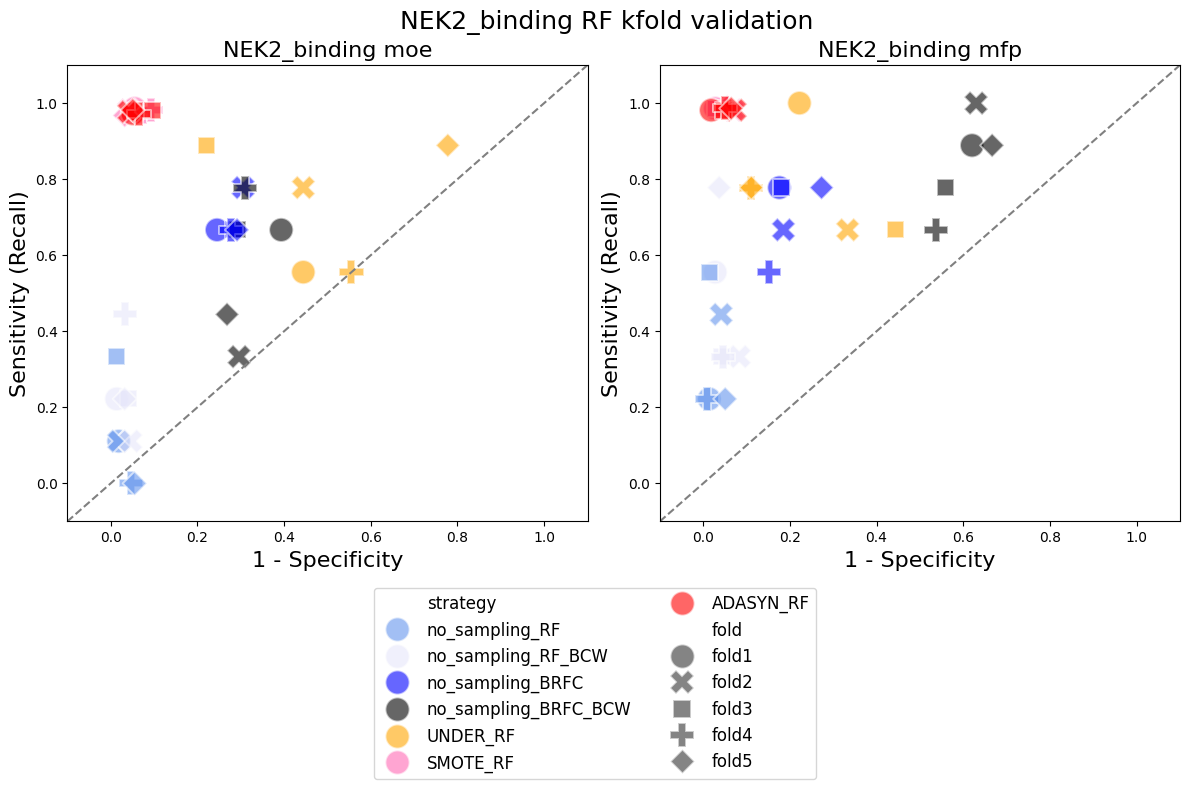

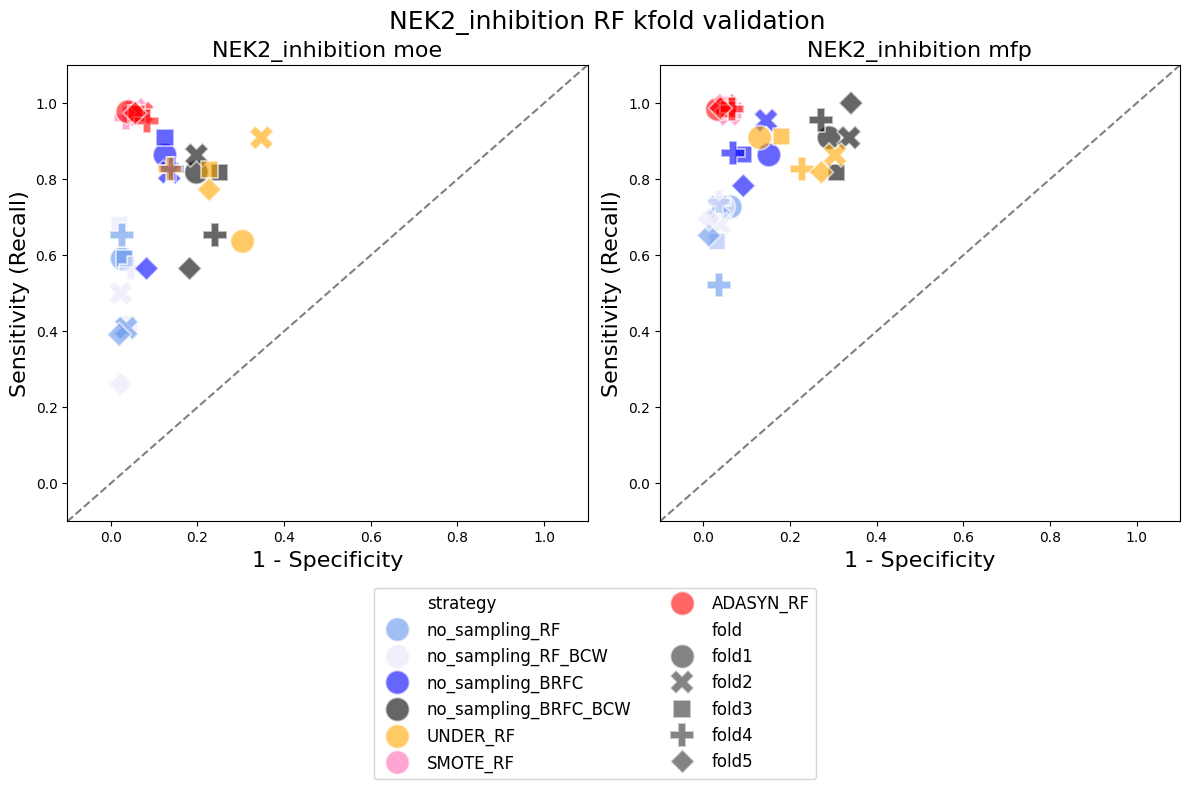

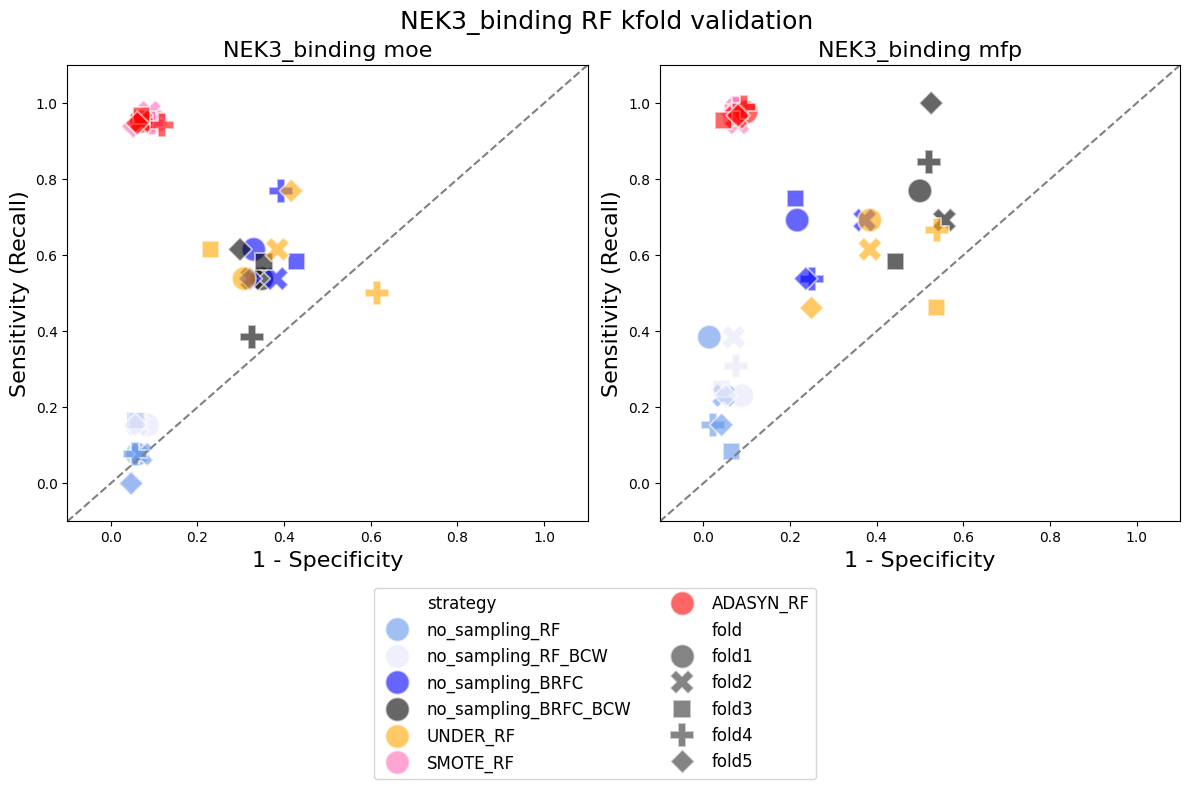

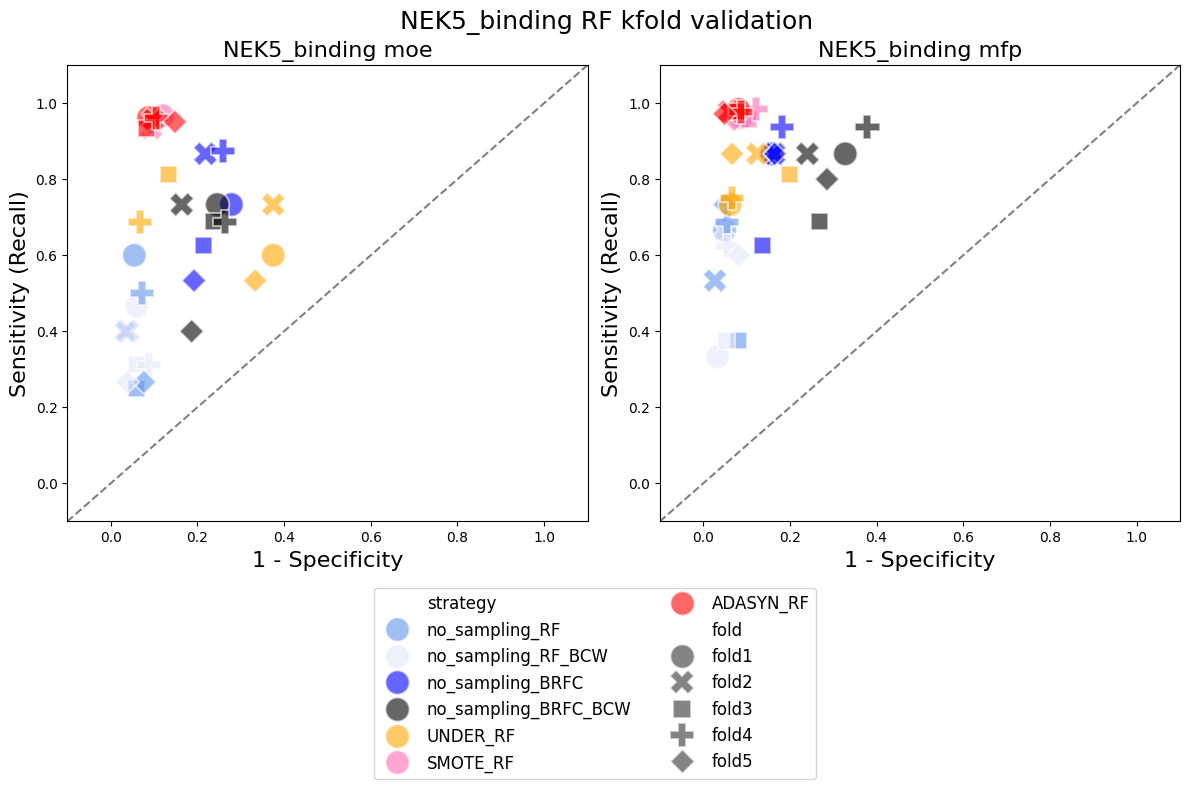

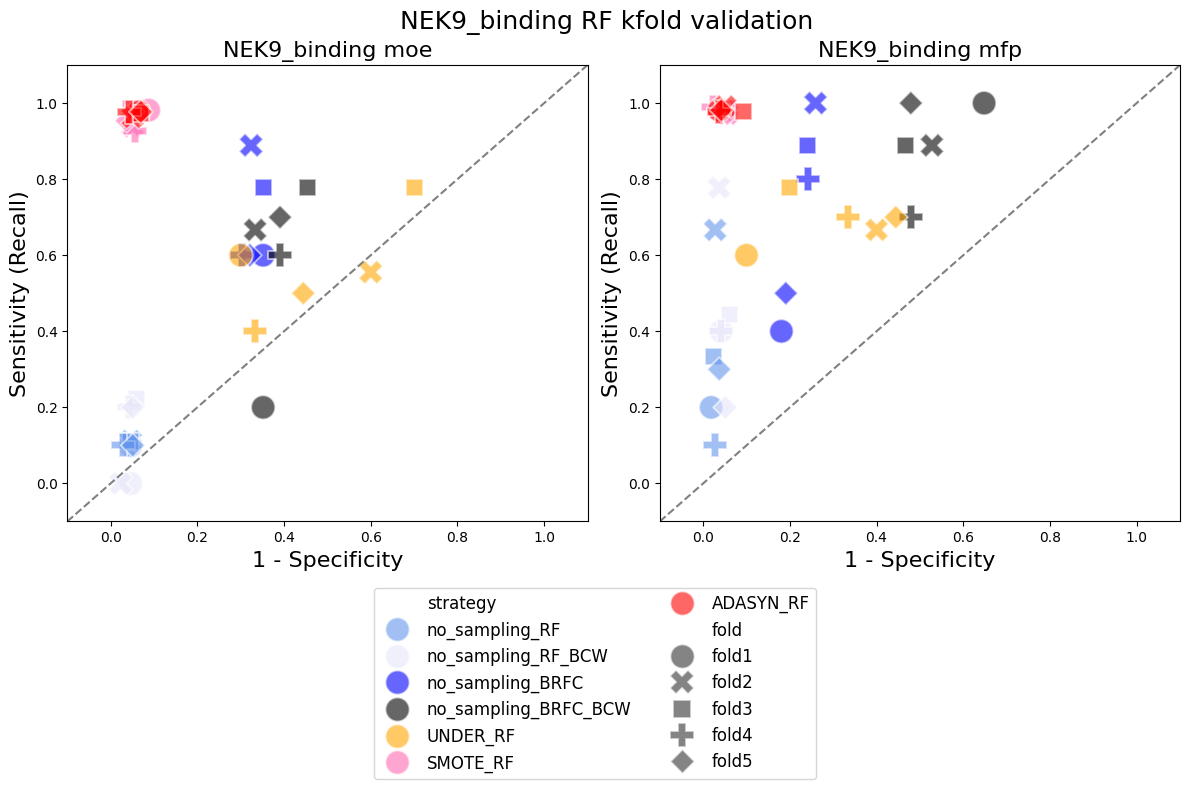

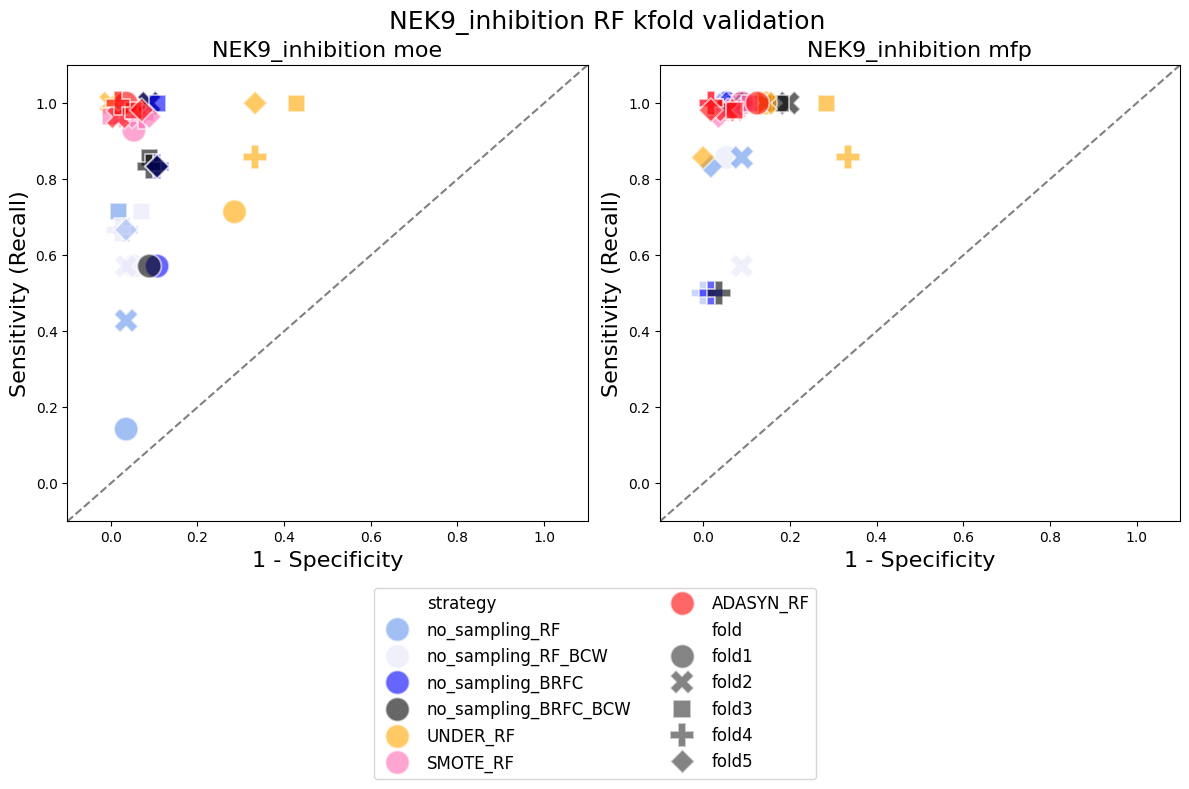

In [90]:
# results_dir2='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/'
# for nek in total_rf['NEK'].unique():
#     fig, axs = plt.subplots(1,2, figsize=(12,6))
#     nek_df = total_rf[total_rf['NEK']==nek]
    
#     moe_df = nek_df[(nek_df['NEK'] == nek) & (nek_df['feat_type'] == 'MOE')]
#     mfp_df = nek_df[(nek_df['NEK'] == nek) & (nek_df['feat_type'] == 'MFP')]
#     sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy', style='fold',
#                    s=300, alpha=0.6, ax=axs[0], legend=True, palette=samp_palette )
#     sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy', style='fold',
#                   s=300, alpha=0.6, ax=axs[1], legend=False, palette=samp_palette )
#     plt.suptitle(f'{nek} RF kfold validation', fontsize=18, x=0.51, y =.96)
#     for i, ax in enumerate(axs): 
#         axs[i].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
#         axs[i].set_xlim(-0.1, 1.1)
#         axs[i].set_ylim(-0.1, 1.1)
#         axs[i].set_xlabel('1 - Specificity', fontsize=16)
#         axs[i].set_ylabel('Sensitivity (Recall)', fontsize=16)
    
        
#     axs[0].set_title(f'{nek} moe', fontsize=16)
#     axs[1].set_title(f'{nek} mfp', fontsize=16)
#     handles, labels = axs[0].get_legend_handles_labels()
#     fig.legend(handles=handles, labels=labels,
#                loc='upper center', bbox_to_anchor=(0.5, .01), ncol=2, fontsize=12)
#     axs[0].get_legend().remove()
    
#     plt.tight_layout(rect=[0, 0, 1, 0.95]) 
#     plt.savefig(f'{results_dir2}{nek}_RF_kfold.png',bbox_inches='tight')
#     plt.tight_layout()
#     plt.show();

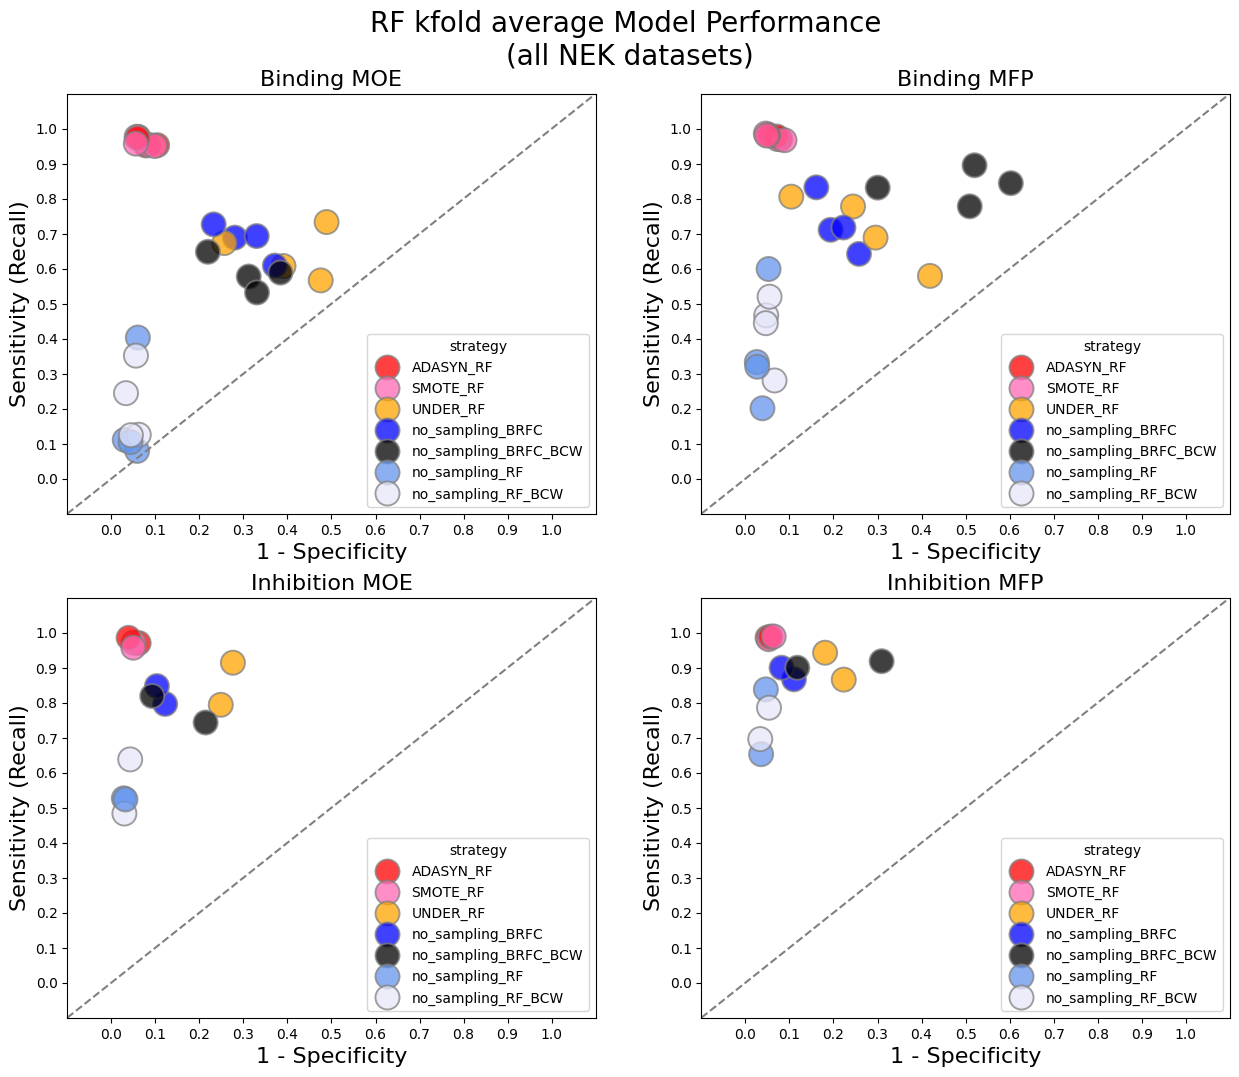

In [91]:
binding_avg = binding.groupby(['NEK','feat_type', 'strategy'])[['recall', '1-specificity']].mean()
binding_avg_df=binding_avg.reset_index()
inhib_avg = inhib.groupby(['NEK','feat_type', 'strategy'])[['recall', '1-specificity']].mean()
inhib_avg_df=inhib_avg.reset_index()
inhib_avg_df
fig, axs = plt.subplots(2,2, figsize=(15,12))

for i, this_df in enumerate(list([binding_avg_df, inhib_avg_df])): 
    moe_df =this_df[this_df['feat_type'] == 'MOE']
    mfp_df = this_df[this_df['feat_type'] == 'MFP']
    
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',
                   alpha=0.75,s=300, edgecolor='gray', ax=axs[i,0], palette=samp_palette)
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',
                   alpha=0.75, s=300,legend=True, ax=axs[i,1],edgecolor='gray', palette=samp_palette)
    for j in range(2):  
        axs[i, j].plot([-0.1, 1.1], [-0.1, 1.1], linestyle='--', color='gray')
        axs[i, j].set_xlabel('1 - Specificity', fontsize=16)
        axs[i, j].set_ylabel('Sensitivity (Recall)', fontsize=16)
        axs[i, j].set_xlim(-0.1, 1.1)
        axs[i, j].set_ylim(-0.1, 1.1)
        axs[i, j].set_xticks(np.arange(0, 1.1, 0.1))
        axs[i, j].set_yticks(np.arange(0, 1.1, 0.1))
        
        # axs[i, j].legend_.remove()
    
    axs[0, 0].set_title(f'Binding MOE', fontsize=16)
    axs[0, 1].set_title(f'Binding MFP', fontsize=16)
    axs[1, 0].set_title(f'Inhibition MOE', fontsize=16)
    axs[1, 1].set_title(f'Inhibition MFP', fontsize=16)

plt.suptitle(f'RF kfold average Model Performance \n(all NEK datasets)', fontsize=20, x=0.5, y=.950)
plt.savefig(f'{results_dir2}RF_average_kfold_val.png', bbox_inches='tight')
plt.show();


In [92]:
inhib_avg

recall  1-specificity
NEK             feat_type strategy                                     
NEK2_inhibition MFP       ADASYN_RF             0.986173       0.050235
                          SMOTE_RF              0.981485       0.052862
                          UNDER_RF              0.866008       0.223320
                          no_sampling_BRFC      0.866798       0.110338
                          no_sampling_BRFC_BCW  0.918577       0.309315
                          no_sampling_RF        0.652964       0.035676
                          no_sampling_RF_BCW    0.696047       0.033696
                MOE       ADASYN_RF             0.970492       0.062138
                          SMOTE_RF              0.971589       0.050891
                          UNDER_RF              0.794071       0.248617
                          no_sampling_BRFC      0.796443       0.122261
                          no_sampling_BRFC_BCW  0.743478       0.214141
                          no_sampling_RF        0.526877       0.028413
                          no_sampling_RF_BCW    0.483399       0.029749
NEK9_inhibition MFP       ADASYN_RF             0.988889       0.057143
                          SMOTE_RF              0.989286       0.064286
                          UNDER_RF              0.942857       0.180952
                          no_sampling_BRFC      0.900000       0.082143
                          no_sampling_BRFC_BCW  0.900000       0.117857
                          no_sampling_RF        0.838095       0.046429
                          no_sampling_RF_BCW    0.785714       0.053571
                MOE       ADASYN_RF             0.985455       0.039286
                          SMOTE_RF              0.957143       0.050000
                          UNDER_RF              0.914286       0.276190
                          no_sampling_BRFC      0.847619       0.103571
                          no_sampling_BRFC_BCW  0.819048       0.092857
                          no_sampling_RF        0.523810       0.032143
                          no_sampling_RF_BCW    0.638095       0.042857

In [93]:
# final_cols=['model','NEK','strategy','feat_type','RF_type','fold', 'cm','recall', 'specificity', 'accuracy', 'precision', 
#             'f1', 'ROC_AUC', 'MCC', 'balanced_accuracy']
# train_results=[]
# test_results=[]
# for nek in neks: 
#     for feat in feats: 
#         for samp in samplings:
#             for fold in folds: 
#                 for rf in RF_types: 
#                     model_name = f'{nek}_{feat}_{samp}_{rf}_{fold}'
#                     print(model_name) 
#                     train = pd.read_csv(f'{results_dir}{model_name}_train.csv') 
#                     test = pd.read_csv(f'{results_dir}{model_name}_test.csv') 
#                     train['fold'] = fold 
#                     test['fold']=fold
    
#                     train_results.append(train.iloc[[0]][final_cols].values.flatten())
#                     test_results.append(test.iloc[[0]][final_cols].values.flatten())
# train_df =  pd.DataFrame(train_results,columns=final_cols)
# test_df =  pd.DataFrame(test_results,columns=final_cols)
# train_df['modeling_type'] = 'RF' 
# train_df['set'] = 'foldvalidation' 
# test_df['modeling_type'] = 'RF' 
# test_df['set'] = 'foldvalidation' 
# train_df.to_csv(results_dir+'RF_train_results_all_NEK_kfold_val.csv', index=False) 
# test_df.to_csv(results_dir+'RF_test_results_all_NEK_kfold_val.csv', index=False) 
# test_df                  
                